In [1]:
import librosa
import librosa.display
from glob import glob
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import IPython.display as ipd
from itertools import cycle
!pip install xlsxwriter
import xlsxwriter
import json
import os


In [2]:
import warnings
warnings.filterwarnings('ignore')
from pickle import dump

In [3]:
audio_files = glob("Extracted_data\*\*\cough-heavy.wav")
k=0
for i in audio_files:
    k=k+1
    print(k,'.',i)

1 . Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0v3g212\cough-heavy.wav
2 . Extracted_data\20200413\3VWhvtBFHKMgEKxlXzMYeg5NeBN2\cough-heavy.wav
3 . Extracted_data\20200413\6MmSmB1lmmOiyKNNA0p7IuVe3CA3\cough-heavy.wav
4 . Extracted_data\20200413\9D1go0wkvuPkFebFk4uQQpcBuZw1\cough-heavy.wav
5 . Extracted_data\20200413\CAf8ILsDpQMeTPPLwi7nFlgRT2t1\cough-heavy.wav
6 . Extracted_data\20200413\FLhjsgqrgQMKwNt5iEryxG5sDlW2\cough-heavy.wav
7 . Extracted_data\20200413\G3iIP9QRHPTItOsK6lpEMd6IQKw1\cough-heavy.wav
8 . Extracted_data\20200413\hRB1GYdlKAgCnwg4xFzAUE3SiUG2\cough-heavy.wav
9 . Extracted_data\20200413\jRjAYMmAQee5uVm5fU8yVnpuvs33\cough-heavy.wav
10 . Extracted_data\20200413\l8qDG3sN6tczDZGHbgPje0suopx1\cough-heavy.wav
11 . Extracted_data\20200413\n4t5cgNQKXO3F8KP55vWOgYWcXC3\cough-heavy.wav
12 . Extracted_data\20200413\O2axQgHDogQ1mORlKYAGiPTiHvB3\cough-heavy.wav
13 . Extracted_data\20200413\U7UmNZmqS6OWTiDkM7IfqkDRrae2\cough-heavy.wav
14 . Extracted_data\20200413\uMry1yqi5sNoykw7yS

In [5]:
print(audio_files)

['Extracted_data\\20200413\\0zexHIcM7tQDdnFiEj2Eb0v3g212\\cough-heavy.wav', 'Extracted_data\\20200413\\3VWhvtBFHKMgEKxlXzMYeg5NeBN2\\cough-heavy.wav', 'Extracted_data\\20200413\\6MmSmB1lmmOiyKNNA0p7IuVe3CA3\\cough-heavy.wav', 'Extracted_data\\20200413\\9D1go0wkvuPkFebFk4uQQpcBuZw1\\cough-heavy.wav', 'Extracted_data\\20200413\\CAf8ILsDpQMeTPPLwi7nFlgRT2t1\\cough-heavy.wav', 'Extracted_data\\20200413\\FLhjsgqrgQMKwNt5iEryxG5sDlW2\\cough-heavy.wav', 'Extracted_data\\20200413\\G3iIP9QRHPTItOsK6lpEMd6IQKw1\\cough-heavy.wav', 'Extracted_data\\20200413\\hRB1GYdlKAgCnwg4xFzAUE3SiUG2\\cough-heavy.wav', 'Extracted_data\\20200413\\jRjAYMmAQee5uVm5fU8yVnpuvs33\\cough-heavy.wav', 'Extracted_data\\20200413\\l8qDG3sN6tczDZGHbgPje0suopx1\\cough-heavy.wav', 'Extracted_data\\20200413\\n4t5cgNQKXO3F8KP55vWOgYWcXC3\\cough-heavy.wav', 'Extracted_data\\20200413\\O2axQgHDogQ1mORlKYAGiPTiHvB3\\cough-heavy.wav', 'Extracted_data\\20200413\\U7UmNZmqS6OWTiDkM7IfqkDRrae2\\cough-heavy.wav', 'Extracted_data\\2020041

y: [-0.00106505 -0.00121813  0.00027772  0.00100618  0.00135798  0.00218259
  0.00293513  0.00364331  0.00427736  0.00474356], y.shape: (178752,), sr: 22050
(128, 350)


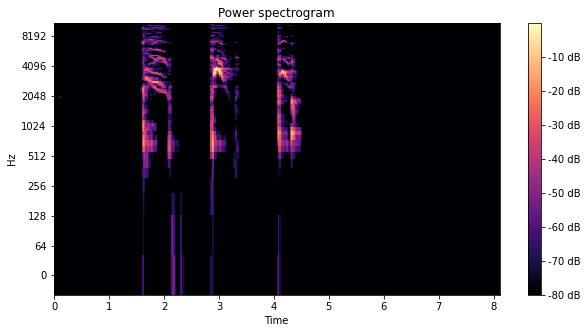

In [11]:
y,sr = librosa.load(audio_files[1])
print(f'y: {y[:10]}, y.shape: {y.shape}, sr: {sr}')

S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
S_dB_mel = librosa.amplitude_to_db(S, ref=np.max)
print(S_dB_mel.shape)
fig,ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_dB_mel, y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
plt.show()

In [6]:
# breathing-deep, breathing-shallow, cough-heavy, cough-shallow, counting-fast, counting-normal
# vowel-a, vowel-e,vowel-o
covid_status_name = ['healthy', 'no_resp_illness_exposed', 'resp_illness_not_identified', 'positive_moderate', 'recovered_full', 'positive_mild', 'positive_asymp', 'under_validation']
for audio_file in audio_files:
    try:
        y,sr = librosa.load(audio_file)
        S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
        S_dB_mel = librosa.amplitude_to_db(S, ref=np.max)
        date = audio_file.split('\\')[1]
        id = audio_file.split('\\')[2]
        file_name = audio_file.split('\\')[3].split('.')[0]
        metadata_path = f"Extracted_data/{date}/{id}/metadata.json"
        file = ""
        if not os.path.exists(f"./metadata/{id}/metadata.json"):
            file = open(metadata_path, 'r')
        elif os.path.exists(f"./metadata/{id}/metadata.json"):
            file = open(f"./metadata/{id}/metadata.json", 'r')
            # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["covid_status_num"] = covid_status_name.index(file_data["covid_status"])
        if 'breathing-deep' in file_name:
            file_data['breathing_deep'] = S_dB_mel.tolist()
        elif 'breathing-shallow' in file_name:
            file_data['breathing_shallow'] = S_dB_mel.tolist()
        elif 'cough-heavy' in file_name:
            file_data['cough_heavy'] = S_dB_mel.tolist()
        elif 'cough-shallow' in file_name:
            file_data['cough_shallow'] = S_dB_mel.tolist()
        elif 'counting-fast' in file_name:
            file_data['counting_fast'] = S_dB_mel.tolist()
        elif 'counting-normal' in file_name:
            file_data['counting_normal'] = S_dB_mel.tolist()
        elif 'vowel-a' in file_name:
            file_data['vowel_a'] = S_dB_mel.tolist()
        elif 'vowel-e' in file_name:
            file_data['vowel_e'] = S_dB_mel.tolist()
        elif 'vowel-o' in file_name:
            file_data['vowel_o'] = S_dB_mel.tolist()
        # Sets file's current position at offset.
        # convert back to json.
        if not os.path.exists(f"./metadata/{id}"):
            os.makedirs(f"./metadata/{id}")
        with open(f"./metadata/{id}/metadata.json", 'w') as json_file:
            json.dump(file_data, json_file)
            
    except Exception as e:
        print("Error: ", e)
        continue

In [7]:
covid_status_name = ['healthy', 'no_resp_illness_exposed', 'resp_illness_not_identified', 'positive_moderate', 'recovered_full', 'positive_mild', 'positive_asymp', 'under_validation']
audio_file = audio_files[0]
print(audio_file)
y,sr = librosa.load(audio_file)
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, fmax=8000)
S_dB_mel = librosa.amplitude_to_db(S, ref=np.max)
date = audio_file.split('\\')[1]
id = audio_file.split('\\')[2]
file_name = audio_file.split('\\')[3].split('.')[0]
metadata_path = f"Extracted_data/{date}/{id}/metadata.json"
file = ""
if not os.path.exists(f"./metadata/{id}/metadata.json"):
    file = open(metadata_path, 'r')
elif os.path.exists(f"./metadata/{id}/metadata.json"):
    file = open(f"./metadata/{id}/metadata.json", 'r')
# First we load existing data into a dict.
# First we load existing data into a dict.
file_data = json.load(file)
print(file)
print(file_data)
# Join new_data with file_data inside emp_details
file_data["covid_status_num"] = covid_status_name.index(file_data["covid_status"])
if 'breathing-deep' in file_name:
    file_data['breathing_deep'] = S_dB_mel.tolist()
elif 'breathing-shallow' in file_name:
    file_data['breathing_shallow'] = S_dB_mel.tolist()
elif 'cough-heavy' in file_name:
    file_data['cough_heavy'] = S_dB_mel.tolist()
elif 'cough-shallow' in file_name:
    file_data['cough_shallow'] = S_dB_mel.tolist()
elif 'counting-fast' in file_name:
    file_data['counting_fast'] = S_dB_mel.tolist()
elif 'counting-normal' in file_name:
    file_data['counting_normal'] = S_dB_mel.tolist()
elif 'vowel-a' in file_name:
    file_data['vowel_a'] = S_dB_mel.tolist()
elif 'vowel-e' in file_name:
    file_data['vowel_e'] = S_dB_mel.tolist()
elif 'vowel-o' in file_name:
    file_data['vowel_o'] = S_dB_mel.tolist()
# Sets file's current position at offset.
# convert back to json.
print(file_data)
if not os.path.exists(f"./metadata/{id}"):
    os.makedirs(f"./metadata/{id}")
with open(f"./metadata/{id}/metadata.json", 'w') as json_file:
    json.dump(file_data, json_file)

Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0v3g212\cough-heavy.wav
<_io.TextIOWrapper name='./metadata/0zexHIcM7tQDdnFiEj2Eb0v3g212/metadata.json' mode='r' encoding='cp1252'>
{'id': '0zexHIcM7tQDdnFiEj2Eb0v3g212', 'a': 29, 'covid_status': 'healthy', 'iF': True, 'ep': 'y', 'g': 'male', 'l_s': 'Gujarat', 'l_l': 'Gandhinagar', 'dT': 'web', 'l_c': 'India', 'covid_status_num': 0, 'cough_heavy': [[-79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79.99999237060547, -79